# Introduction to Python - Session 3
1. Installing and using packages
2. Data wrangling:
    - The numpy package
    - The pandas package

SLIDES [HERE](https://docs.google.com/presentation/d/1hMFSNd42hD19_2c5cj5uP17N9uprZWX-PDRobyfhiPQ/export/pdf)

## EXERCISE 1 - Introduction to NumPy

In [31]:
import numpy as np

**1. Create an array `a` of random numbers and shape (3,4).**

In [40]:
a = np.random.normal(size=(3,4))
a

array([[-0.51915848,  0.66748191, -1.00457491,  2.15547403],
       [ 0.28215934, -1.23791706,  0.37058204, -0.52457078],
       [-0.71350475, -0.31829367,  1.34558394,  0.07894746]])

**2. Add a fifth column to `a` with values 0, 0.5, and 1.**

In [45]:
a = np.column_stack([a,np.array([0,0.5,1])])
a

array([[-0.51915848,  0.66748191, -1.00457491,  2.15547403,  0.        ],
       [ 0.28215934, -1.23791706,  0.37058204, -0.52457078,  0.5       ],
       [-0.71350475, -0.31829367,  1.34558394,  0.07894746,  1.        ]])

**3. Find all values that are greater or equal to 0.5.**

In [46]:
a[a >= 0.5]

array([[False,  True, False,  True, False],
       [False, False, False, False,  True],
       [False, False,  True, False,  True]])

**4. Replace all the first row with NAs.**

In [47]:
a[0,:] = np.nan
a

array([[        nan,         nan,         nan,         nan,         nan],
       [ 0.28215934, -1.23791706,  0.37058204, -0.52457078,  0.5       ],
       [-0.71350475, -0.31829367,  1.34558394,  0.07894746,  1.        ]])

**5. Use matrix multiplication against the vector `b = np.array([1, 0, 10])`.**

In [50]:
b = np.array([1,0,10]).reshape(-1,1)
a.T.dot(b)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

**6. Element-wise multiplication of the same vectors `a` and `b`.** Note that `b` is broadcasted along all rows.

In [51]:
a * b

array([[        nan,         nan,         nan,         nan,         nan],
       [ 0.        , -0.        ,  0.        , -0.        ,  0.        ],
       [-7.13504754, -3.18293673, 13.45583943,  0.78947455, 10.        ]])

**7. Calculate the sum, the mean, and the median of each row of `a`. Use the so-called numpy functions.**

In [58]:
np.sum(a, axis=1)

array([        nan, -0.60974646,  1.39273297])

In [59]:
np.mean(a, axis=1)

array([        nan, -0.12194929,  0.27854659])

In [60]:
np.median(a, axis=1)

array([       nan, 0.28215934, 0.07894746])

## EXERCISE 2 - Introduction to Pandas

In [1]:
import pandas as pd

**1. Create the following DataFrame `mydf`, with index `John, Jessica, Steve, Rachel` and columns `Age, Height, Sex`.**

```
43 	181 	M
34 	172 	F
22 	189 	M
27 	167 	F
```

In [2]:
mydf = pd.DataFrame({
    "Age": [43, 34, 22, 27],
    "Height": [181, 172, 189, 167],
    "Sex": ["M", "F", "M", "F"]
}, index=["John","Jessica","Steve","Rachel"])
mydf

,Age,Height,Sex
John,43,181,M
Jessica,34,172,F
Steve,22,189,M
Rachel,27,167,F


**2. What is the shape of `mydf`?**

In [3]:
mydf.shape

(4, 3)

**3. Calculate the average age and height in `mydf`.**

In [4]:
mydf[["Height","Age"]].mean()

Height    177.25
Age        31.50
dtype: float64

**4. Add one row to `mydf`: Georges who is 53 years old, 168cm tall, and Male.**

In [5]:
mydf.loc["Georges"] = [53, 168, "M"]
mydf

,Age,Height,Sex
John,43,181,M
Jessica,34,172,F
Steve,22,189,M
Rachel,27,167,F
Georges,53,168,M


**5. Change the row names of `mydf` so that the data becomes anonymous.** Use Patient1, Patient2, etc. instead of actual names.

In [12]:
mydf = mydf.reset_index(drop=True)
mydf.index = ['Patient'+str(i) for i in mydf.index]

In [17]:
mydf

,Age,Height,Sex
Patient0,43,181,M
Patient1,34,172,F
Patient2,22,189,M
Patient3,27,167,F
Patient4,53,168,M


**6. Create the DataFrame `mydf2` that is a subset of `mydf` containing only the female entries.**

In [18]:
mydf2 = mydf.loc[mydf["Sex"]=="F"]
mydf2

,Age,Height,Sex
Patient1,34,172,F
Patient3,27,167,F


**7. Import the data in `more_patients.tsv` in a DataFrame named `moredf`.**

In [21]:
moredf = pd.read_table("data/more_patients.tsv", index_col=0)
moredf

,Age,Height,Sex
Patient6,18,175,M
Patient7,60,170,F
Patient8,36,169,F


**8. Create a DataFrame `mydf3` by concatenating `mydf` and `moredf`.**

In [22]:
mydf3 = pd.concat([mydf,moredf])
mydf3

,Age,Height,Sex
Patient0,43,181,M
Patient1,34,172,F
Patient2,22,189,M
Patient3,27,167,F
Patient4,53,168,M
Patient6,18,175,M
Patient7,60,170,F
Patient8,36,169,F


**9. Calculate the number of male and female patients combining the `.groupby` and `.size` methods in `mydf3`.**

In [24]:
mydf3.groupby("Sex").size()

Sex
F    4
M    4
dtype: int64

**10. Calculate the average age and height by sex combining the `.groupby` and `.mean` methods in `mydf3`.**

In [23]:
mydf3.groupby("Sex").mean()

,Age,Height
Sex,,
F,39.25,169.50
M,34.00,178.25


**11. Calculate the average age and height by sex using the `.groupby` and `.apply` methods in `mydf3`.**

In [26]:
mydf3.groupby("Sex")[["Age","Height"]].apply(lambda x: x.mean())

,Age,Height
Sex,,
F,39.25,169.50
M,34.00,178.25


**13. Standardize age and height by sex combining the `groupby` and `apply` methods in `mydf3`.**

In [30]:
mydf3.groupby("Sex")[["Age","Height"]].apply(lambda x: (x - x.mean()) / x.std())

,Age,Height
Patient0,0.537214,0.308263
Patient1,-0.365563,1.200961
Patient2,-0.716285,1.205029
Patient3,-0.852981,-1.200961
Patient4,1.134118,-1.148981
Patient6,-0.955047,-0.364311
Patient7,1.444845,0.240192
Patient8,-0.226301,-0.240192


## EXERCISE 3 - Analyzing COVID-19 data

Adapted from: https://www.w3resource.com/python-exercises/project/covid-19/index.php

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

**File naming convention**

MM-DD-YYYY.csv in UTC.

**Field description**

- Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
- Country/Region: country/region name conforming to WHO (will be updated).
- Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
- Deaths: the number of deaths.
- Recovered: the number of recovered cases.

**Upload the latest update of the dataset.**

In [ ]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-05-2020.csv')

**1. Write a Python program to display first 5 rows from COVID-19 dataset. Also print the dataset information (`info()`) and check the missing values (`isna()`).**

In [ ]:
covid_data.head(n=5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-06 04:28:33,33.93911,67.709953,38324,1409,30082,6833.0,Afghanistan,98.447555,3.676547
1,NaN,NaN,NaN,Albania,2020-09-06 04:28:33,41.15330,20.168300,10102,312,5976,3814.0,Albania,351.032038,3.088497
2,NaN,NaN,NaN,Algeria,2020-09-06 04:28:33,28.03390,1.659600,46071,1549,32481,12041.0,Algeria,105.062495,3.362202
3,NaN,NaN,NaN,Andorra,2020-09-06 04:28:33,42.50630,1.521800,1215,53,928,234.0,Andorra,1572.510192,4.362140
4,NaN,NaN,NaN,Angola,2020-09-06 04:28:33,-11.20270,17.873900,2935,117,1192,1626.0,Angola,8.930129,3.986371


In [ ]:
print("Dataset information:")
print(covid_data.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3954 entries, 0 to 3953
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3259 non-null   float64
 1   Admin2               3264 non-null   object 
 2   Province_State       3786 non-null   object 
 3   Country_Region       3954 non-null   object 
 4   Last_Update          3954 non-null   object 
 5   Lat                  3874 non-null   float64
 6   Long_                3874 non-null   float64
 7   Confirmed            3954 non-null   int64  
 8   Deaths               3954 non-null   int64  
 9   Recovered            3954 non-null   int64  
 10  Active               3953 non-null   float64
 11  Combined_Key         3954 non-null   object 
 12  Incidence_Rate       3874 non-null   float64
 13  Case-Fatality_Ratio  3905 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 432.6+ KB
None


In [ ]:
print("Missing data information:")
print(covid_data.isna().sum())

Missing data information:
FIPS                   695
Admin2                 690
Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   1
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     49
dtype: int64


**2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of COVID-19 country-wise.** HINT: You can use the `groupby` fucntion.

In [ ]:
result = covid_data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
result

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,38324,1409,30082,6833.0
Albania,10102,312,5976,3814.0
Algeria,46071,1549,32481,12041.0
Andorra,1215,53,928,234.0
Angola,2935,117,1192,1626.0
...,...,...,...,...
West Bank and Gaza,25575,177,16661,8737.0
Western Sahara,10,1,8,1.0
Yemen,1983,572,1197,214.0


**3. Write a Python program to get the Spanish `Province_State` cases of confirmed, deaths, recovered and active cases of COVID-19. Use `sort_values` to sort the values. Save the resulting dataframe as a csv file.**

In [ ]:
c_data = covid_data.loc[covid_data.Country_Region=='Spain',:]
c_data = c_data.loc[:,['Province_State', 'Confirmed', 'Deaths', 'Recovered','Active']]
result = c_data.sort_values(by='Active', ascending=False)
result = result.set_index("Province_State", drop=True)
result
result.to_csv("results/Spain_COVID_cases.csv")

,Confirmed,Deaths,Recovered,Active
Province_State,,,,
Madrid,136901,8728,40736,87437.0
Catalonia,114987,5761,26203,83023.0
Aragon,27493,1212,3772,22509.0
Andalusia,33687,1516,10671,21500.0
Castilla y Leon,30531,2856,8716,18959.0
Castilla - La Mancha,25737,3048,6392,16297.0
C. Valenciana,26710,1478,9970,15262.0
Pais Vasco,32006,1580,16160,14266.0
Baleares,9191,243,1533,7415.0


**4. Make a bar plot of the active cases of the previous DataFrame.** Pandas has some very simple plotting function for DataFrames included, which can often be very convenient. Here, you can use the `DataFrame.plot.bar()` function. For more compplicated plots, the package MatPlotLib is recommended.

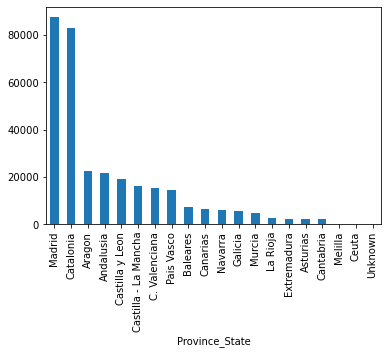

In [ ]:
result["Active"].plot.bar()

**5. Make a scatter plot of confirmed cases againts deaths for all `Province_State` of the previous DataFrame.** Use the `DataFrame.plot.scatter()` function.

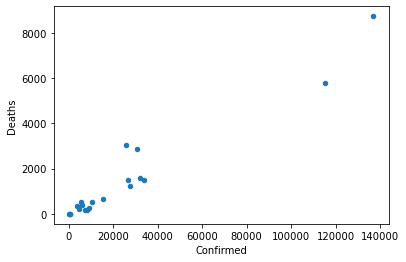

In [ ]:
result.plot.scatter(x="Confirmed", y="Deaths")

**6. Write a Python program to list countries with no cases of COVID-19 recovered.**

In [ ]:
data = covid_data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
result = data.loc[data.Recovered == 0,:]
result = result.loc[:,['Country_Region', 'Confirmed', 'Recovered']]
result = result.sort_values('Confirmed', ascending=False)
result = result.loc[result['Confirmed']>0,:] # Remove countries with no cases
result = result.reset_index(drop=True)
result

,Country_Region,Confirmed,Recovered
0,Sweden,84985,0
1,Serbia,31772,0
2,MS Zaandam,9,0
